In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

import datetime as dt
from datetime import datetime, timedelta

import pandas as pd

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


In [6]:
dir("Measurement")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [7]:
list(Measurement.__table__.columns)

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [8]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# month_June = dt.date(2017, 6, 1) - dt.timedelta(days=30)
results_query = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()
for result in results_query:
    print(result)

('2010-06-01', 78.0)
('2010-06-02', 76.0)
('2010-06-03', 78.0)
('2010-06-04', 76.0)
('2010-06-05', 77.0)
('2010-06-06', 78.0)
('2010-06-07', 77.0)
('2010-06-08', 78.0)
('2010-06-09', 78.0)
('2010-06-10', 79.0)
('2010-06-11', 78.0)
('2010-06-12', 78.0)
('2010-06-13', 78.0)
('2010-06-14', 77.0)
('2010-06-15', 78.0)
('2010-06-16', 78.0)
('2010-06-17', 77.0)
('2010-06-18', 77.0)
('2010-06-19', 82.0)
('2010-06-20', 78.0)
('2010-06-21', 78.0)
('2010-06-22', 78.0)
('2010-06-23', 78.0)
('2010-06-24', 78.0)
('2010-06-25', 77.0)
('2010-06-26', 76.0)
('2010-06-27', 78.0)
('2010-06-28', 78.0)
('2010-06-29', 78.0)
('2010-06-30', 78.0)
('2011-06-01', 77.0)
('2011-06-02', 78.0)
('2011-06-03', 73.0)
('2011-06-04', 70.0)
('2011-06-05', 76.0)
('2011-06-06', 77.0)
('2011-06-07', 77.0)
('2011-06-08', 77.0)
('2011-06-09', 77.0)
('2011-06-10', 78.0)
('2011-06-11', 77.0)
('2011-06-12', 77.0)
('2011-06-13', 78.0)
('2011-06-14', 78.0)
('2011-06-15', 77.0)
('2011-06-17', 78.0)
('2011-06-18', 78.0)
('2011-06-19'

In [9]:
#  3. Convert the June temperatures to a list.
June_temp = list()

# June_temp =[result[1] for result in results_query]
for result in results_query:
    June_temp.append(result[1])
June_temp

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [10]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results_query, columns=['date','tobs'])
df.head()

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [11]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_temp_query = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==12).all()
for result in Dec_temp_query:
    print(result)

('2010-12-01', 76.0)
('2010-12-03', 74.0)
('2010-12-04', 74.0)
('2010-12-06', 64.0)
('2010-12-07', 64.0)
('2010-12-08', 67.0)
('2010-12-09', 77.0)
('2010-12-10', 66.0)
('2010-12-11', 69.0)
('2010-12-12', 68.0)
('2010-12-13', 68.0)
('2010-12-14', 71.0)
('2010-12-15', 74.0)
('2010-12-16', 67.0)
('2010-12-17', 66.0)
('2010-12-18', 69.0)
('2010-12-19', 71.0)
('2010-12-23', 70.0)
('2010-12-24', 70.0)
('2010-12-26', 74.0)
('2010-12-27', 74.0)
('2010-12-28', 71.0)
('2010-12-29', 75.0)
('2010-12-30', 75.0)
('2010-12-31', 72.0)
('2011-12-01', 69.0)
('2011-12-02', 68.0)
('2011-12-03', 73.0)
('2011-12-04', 74.0)
('2011-12-05', 73.0)
('2011-12-06', 73.0)
('2011-12-07', 73.0)
('2011-12-08', 73.0)
('2011-12-09', 71.0)
('2011-12-10', 73.0)
('2011-12-11', 73.0)
('2011-12-12', 77.0)
('2011-12-13', 72.0)
('2011-12-14', 71.0)
('2011-12-15', 73.0)
('2011-12-16', 70.0)
('2011-12-17', 73.0)
('2011-12-18', 69.0)
('2011-12-19', 74.0)
('2011-12-20', 72.0)
('2011-12-21', 71.0)
('2011-12-22', 72.0)
('2011-12-23'

In [13]:
# 7. Convert the December temperatures to a list.
Dec_temp = list()

# Dec_temp =[result[1] for result in results_query]
for result in Dec_temp_query:
    Dec_temp.append(result[1])
Dec_temp

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temp_df = pd.DataFrame(Dec_temp_query, columns=['date','tobs'])
Dec_temp_df.head()


,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temp_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Deliverable 3 queries 

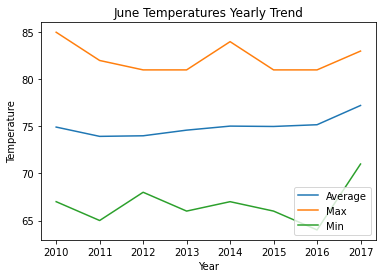

In [22]:
# --- What is the trend year over year??
#June Temperature trend
Jun_Temp_query=session.query(extract('year',Measurement.date),func.avg(Measurement.tobs),func.max(Measurement.tobs),func.min(Measurement.tobs)).filter(extract('month',Measurement.date)==6).group_by(extract('year',Measurement.date)).all()
Jun_Temp_query
Jun_Temps= pd.DataFrame(Jun_Temp_query,columns=['year','Average','Max','Min'])
Jun_Temps 

lines = Jun_Temps.plot.line(x='year', xlabel='Year' ,ylabel='Temperature' ,title='June Temperatures Yearly Trend')

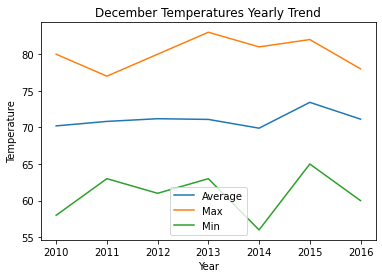

In [25]:
#December Temperature trend
Dec_Temp_query=session.query(extract('year',Measurement.date),func.avg(Measurement.tobs),func.max(Measurement.tobs),func.min(Measurement.tobs)).filter(extract('month',Measurement.date)==12).group_by(extract('year',Measurement.date)).all()
Dec_Temp_query
Dec_Temps= pd.DataFrame(Dec_Temp_query,columns=['year','Average','Max','Min'])
Dec_Temps  
lines = Dec_Temps.plot.line(x='year', xlabel='Year' ,ylabel='Temperature' ,title='December Temperatures Yearly Trend')

In [ ]:
#June Precipitation trend
Jun_Prcp_query=session.query(extract('year',Measurement.date),func.avg(Measurement.prcp)).filter(extract('month',Measurement.date)==6).group_by(extract('year',Measurement.date)).all()
Jun_Prcp_query
Jun_Prcp= pd.DataFrame(Jun_Prcp_query,columns=['year','Average'])
Jun_Prcp 

lines = Jun_Prcp.plot.line(x='year', xlabel='Year' ,ylabel='Precipitation' ,title='June Precipitation Yearly Trend')

In [ ]:
#December Precipitation trend
Dec_Prcp_query=session.query(extract('year',Measurement.date),func.avg(Measurement.prcp)).filter(extract('month',Measurement.date)==12).group_by(extract('year',Measurement.date)).all()
Dec_Prcp_query
Dec_Prcp= pd.DataFrame(Dec_Prcp_query,columns=['year','Average'])
Dec_Prcp 

lines = Dec_Prcp.plot.line(x='year', xlabel='Year' ,ylabel='Precipitation' ,title='December Precipitation Yearly Trend')

In [ ]:
#June December Precipitation combined trend 
June_vs_Dec_precp= Jun_Prcp.merge(Dec_Prcp,left_on='year', right_on='year',  suffixes=(' Prcp. Jun', ' Prcp. Dec'))
June_vs_Dec_precp.head()
lines = June_vs_Dec_precp.plot.line(x='year', xlabel='Year',ylabel='Precipitation',title='June vs. December Average Precipitation Yearly Trend')